In [52]:
flights_df = spark.table("flights")
# preview of flights table
display(flights_df)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 54, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, be1ed6ca-7d3c-4632-a908-af6fdc3d3bfb)

In [53]:
hotels_df = spark.table("hotels")
display(hotels_df)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 55, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 4a877ce5-043c-4bf4-bf6b-979a20b5e916)

In [54]:
users_df = spark.table("users")
display(users_df)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 56, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, a07b5825-9b3f-46c2-a5c8-0cf9692e007b)

In [55]:
# Convert to pandas df
flights = flights_df.toPandas()
flights.head()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 57, Finished, Available, Finished)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,67621,655,Salvador (BH),Natal (RN),firstClass,1241.04,1.85,710.57,FlyingDrops,01/04/2021
1,67784,657,Salvador (BH),Natal (RN),firstClass,1241.04,1.85,710.57,FlyingDrops,05/22/2020
2,68115,660,Salvador (BH),Natal (RN),firstClass,1241.04,1.85,710.57,FlyingDrops,05/29/2020
3,68254,661,Salvador (BH),Natal (RN),firstClass,1241.04,1.85,710.57,FlyingDrops,01/09/2022
4,68627,664,Salvador (BH),Natal (RN),firstClass,1241.04,1.85,710.57,FlyingDrops,03/25/2022


In [56]:
hotels = hotels_df.toPandas()
hotels.head()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 58, Finished, Available, Finished)

,travelCode,userCode,name,place,days,price,total,date
0,137,2,Hotel A,Florianopolis (SC),3,313.02,939.06,07/16/2020
1,197,2,Hotel A,Florianopolis (SC),3,313.02,939.06,09/09/2021
2,235,3,Hotel A,Florianopolis (SC),3,313.02,939.06,11/28/2019
3,306,3,Hotel A,Florianopolis (SC),3,313.02,939.06,04/08/2021
4,826,8,Hotel A,Florianopolis (SC),3,313.02,939.06,10/24/2019


In [57]:
users = users_df.toPandas()
users.head()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 59, Finished, Available, Finished)

,code,company,name,gender,age
0,1149,Umbrella LTDA,Troy Gates,male,59
1,1155,Umbrella LTDA,Megan Anderson,female,59
2,1177,Umbrella LTDA,Brenda Faulk,female,59
3,1254,Umbrella LTDA,Lorraine Langston,female,59
4,1296,Umbrella LTDA,Julie Lefebvre,female,59


In [58]:
# task
# convert pandas df to appropriate date format for date column

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 60, Finished, Available, Finished)

In [59]:
print(flights.shape)
print(hotels.shape)
print(users.shape)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 61, Finished, Available, Finished)

(271888, 10)
(40552, 8)
(1340, 5)


In [60]:
n1=flights.isnull().sum()
n2=hotels.isnull().sum()
n3=users.isnull().sum()
print(f"Null count in flights: \n{n1}")
print(f"Null count in hotels: \n{n2}")
print(f"Null count in users: \n{n3}")
#There are no null values in the datasets

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 62, Finished, Available, Finished)

Null count in flights: 
travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64
Null count in hotels: 
travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64
Null count in users: 
code       0
company    0
name       0
gender     0
age        0
dtype: int64


In [61]:
num_flights= flights.select_dtypes(include="number").columns
Q1=flights[num_flights].quantile(0.25)
Q3=flights[num_flights].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

mask_outlier = (flights[num_flights] < lower) | (flights[num_flights] > upper)
row_has_outlier = mask_outlier.any(axis=1)
outlier_rows = flights[row_has_outlier]
print(f"Rows with outlier: {outlier_rows}")

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 63, Finished, Available, Finished)

Rows with outlier: Empty DataFrame
Columns: [travelCode, userCode, from, to, flightType, price, time, distance, agency, date]
Index: []


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 64, Finished, Available, Finished)

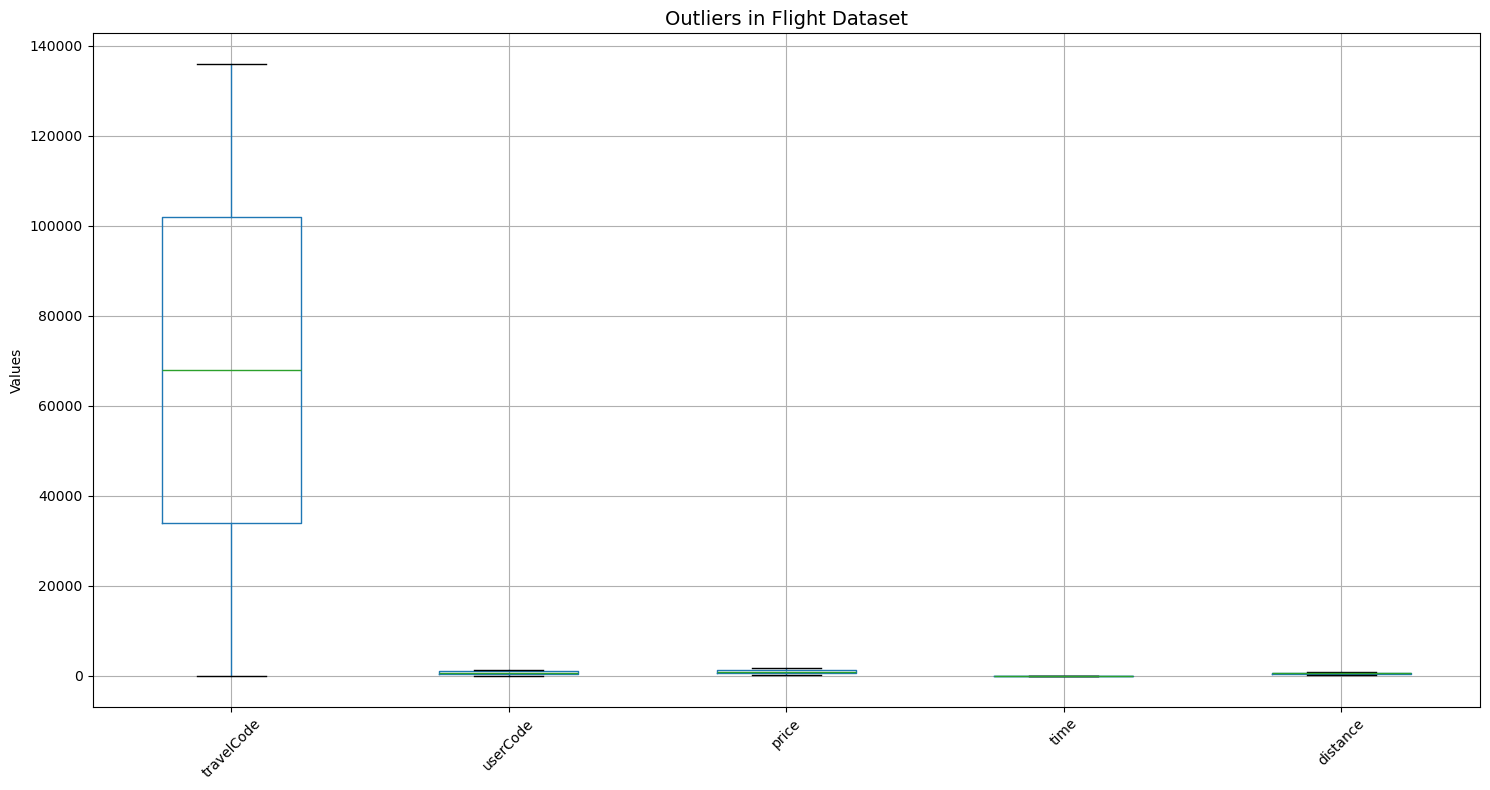

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
flights[num_flights].boxplot(rot=45)
plt.title("Outliers in Flight Dataset", fontsize=14)
plt.ylabel("Values")
plt.tight_layout()
plt.show()


In [63]:
#The travelcode can vary for different range so its not an outlier issue and other features did ot have that much outliers.

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 65, Finished, Available, Finished)

In [64]:
num_hotels= hotels.select_dtypes(include="number").columns
Q1=hotels[num_hotels].quantile(0.25)
Q3=hotels[num_hotels].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

mask_outlier = (hotels[num_hotels] < lower) | (hotels[num_hotels] > upper)
row_has_outlier = mask_outlier.any(axis=1)
outlier_rows = hotels[row_has_outlier]
print(f"Rows with outlier: {outlier_rows}")

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 66, Finished, Available, Finished)

Rows with outlier: Empty DataFrame
Columns: [travelCode, userCode, name, place, days, price, total, date]
Index: []


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 67, Finished, Available, Finished)

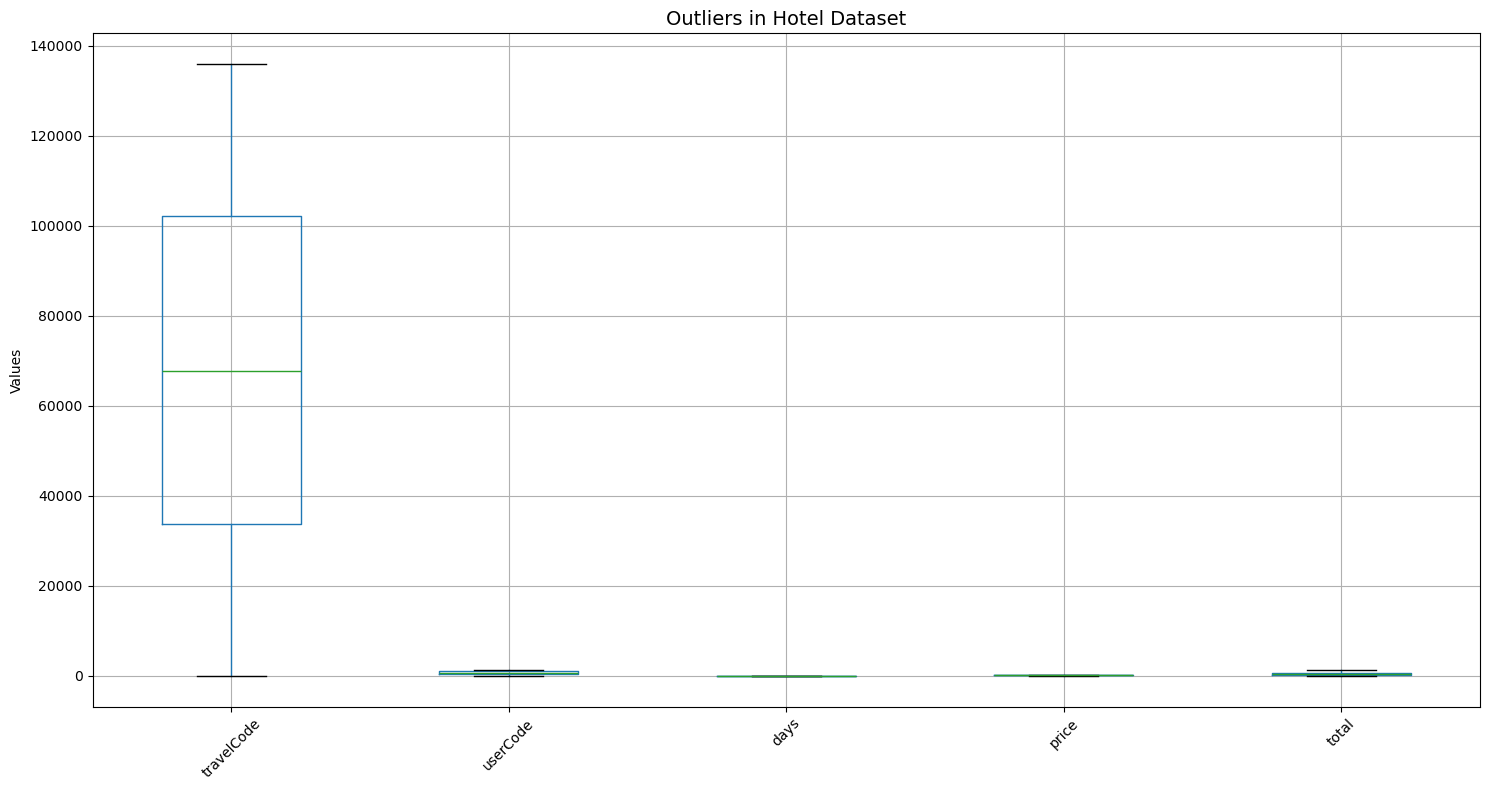

In [65]:
plt.figure(figsize=(15, 8))
hotels[num_hotels].boxplot(rot=45)
plt.title("Outliers in Hotel Dataset", fontsize=14)
plt.ylabel("Values")
plt.tight_layout()
plt.show()

In [66]:
#Again the same as flights

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 68, Finished, Available, Finished)

In [67]:
import pandas as pd
# Merge flights with users on userCode
flights_users = pd.merge(flights, users, left_on='userCode', right_on='code', how='left')

# Merge the result with hotels on travelCode and userCode
merged_data = pd.merge(flights_users, hotels, on=['travelCode', 'userCode'], how='left')

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 69, Finished, Available, Finished)

In [68]:

merged_data.info()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 70, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int32  
 1   userCode    271888 non-null  int32  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price_x     271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date_x      271888 non-null  object 
 10  code        271888 non-null  int32  
 11  company     271888 non-null  object 
 12  name_x      271888 non-null  object 
 13  gender      271888 non-null  object 
 14  age         271888 non-null  int32  
 15  name_y      81104 non-null   object 
 16  place       81104 non-null   object 
 17  days        81104 non-null   float64
 18  price_y     81104 non-null   float64
 19  to

In [69]:
merged_data.duplicated().sum()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 71, Finished, Available, Finished)

0

In [70]:
merged_data.columns

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 72, Finished, Available, Finished)

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price_x', 'time',
       'distance', 'agency', 'date_x', 'code', 'company', 'name_x', 'gender',
       'age', 'name_y', 'place', 'days', 'price_y', 'total', 'date_y'],
      dtype='object')

In [71]:
merged_data.describe().T

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 73, Finished, Available, Finished)

,count,mean,std,min,25%,50%,75%,max
travelCode,271888.0,67971.500000,39243.724665,0.00,33985.75,67971.50,101957.25,135943.00
userCode,271888.0,667.505495,389.523127,0.00,326.00,659.00,1011.00,1339.00
price_x,271888.0,957.375030,362.311890,301.51,672.66,904.00,1222.24,1754.17
time,271888.0,1.421147,0.542541,0.44,1.04,1.46,1.76,2.44
distance,271888.0,546.955535,208.851288,168.22,401.66,562.14,676.53,937.77
code,271888.0,667.505495,389.523127,0.00,326.00,659.00,1011.00,1339.00
age,271888.0,42.815005,12.946294,21.00,32.00,42.00,54.00,65.00
days,81104.0,2.499679,1.119319,1.00,1.00,2.00,4.00,4.00
price_y,81104.0,214.439554,76.741832,60.39,165.99,242.88,263.41,313.02
total,81104.0,536.229513,319.329514,60.39,247.62,495.24,742.86,1252.08


In [72]:
for i in list(merged_data.columns):
  print(f'{i} : {merged_data[i].nunique()}')

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 74, Finished, Available, Finished)

travelCode : 135944
userCode : 1335
from : 9
to : 9
flightType : 3
price_x : 490
time : 33
distance : 35
agency : 3
date_x : 999
code : 1335
company : 5
name_x : 1333
gender : 3
age : 45
name_y : 9
place : 9
days : 4
price_y : 9
total : 36
date_y : 199


In [73]:
# Check Unique Values for each variable.
for i in list(merged_data.columns):
    print(f'{i} : {merged_data[i].value_counts()}')

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 75, Finished, Available, Finished)

travelCode : travelCode
67621    2
64477    2
65576    2
65567    2
65180    2
        ..
50151    2
50142    2
50049    2
49959    2
24111    2
Name: count, Length: 135944, dtype: int64
userCode : userCode
1026    400
322     400
766     400
925     400
241     400
       ... 
463       2
883       2
406       2
910       2
527       2
Name: count, Length: 1335, dtype: int64
from : from
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64
to : to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64
flightType : flightType
fir

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 76, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


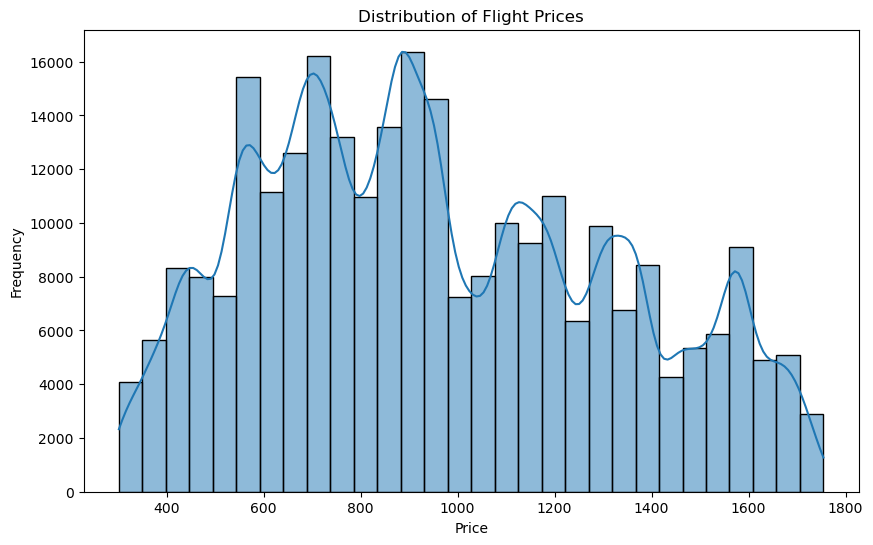

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(flights['price'], kde=True, bins=30)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 77, Finished, Available, Finished)

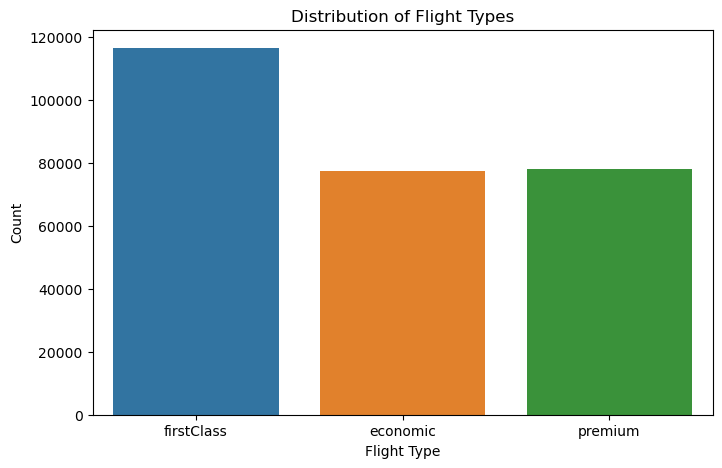

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(data=flights, x='flightType')
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 78, Finished, Available, Finished)

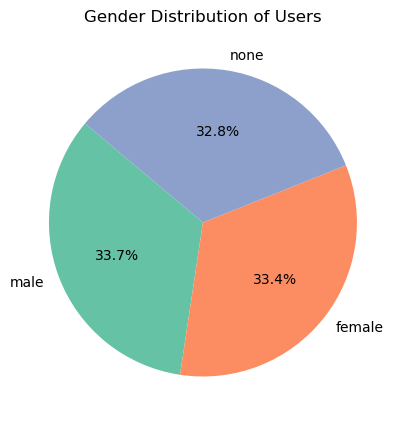

In [76]:
gender_counts = users['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'], startangle=140)
plt.title("Gender Distribution of Users")
plt.show()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 79, Finished, Available, Finished)

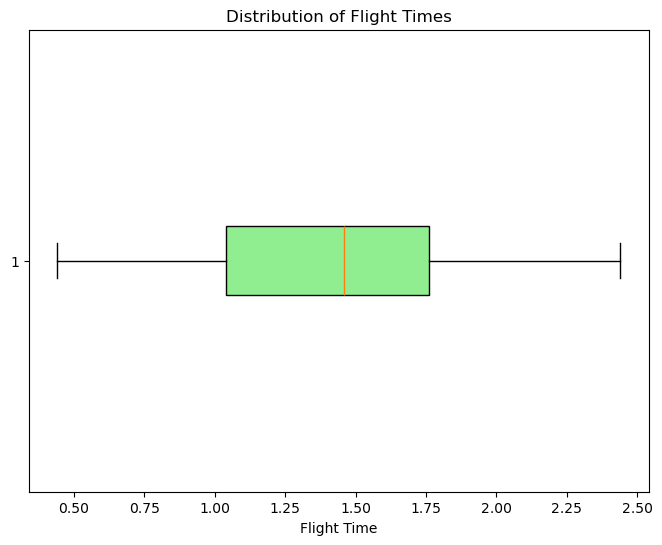

In [77]:
plt.figure(figsize=(8, 6))
plt.boxplot(merged_data['time'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Flight Time')
plt.title('Distribution of Flight Times')
plt.savefig('chart2.png')
plt.show()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 80, Finished, Available, Finished)

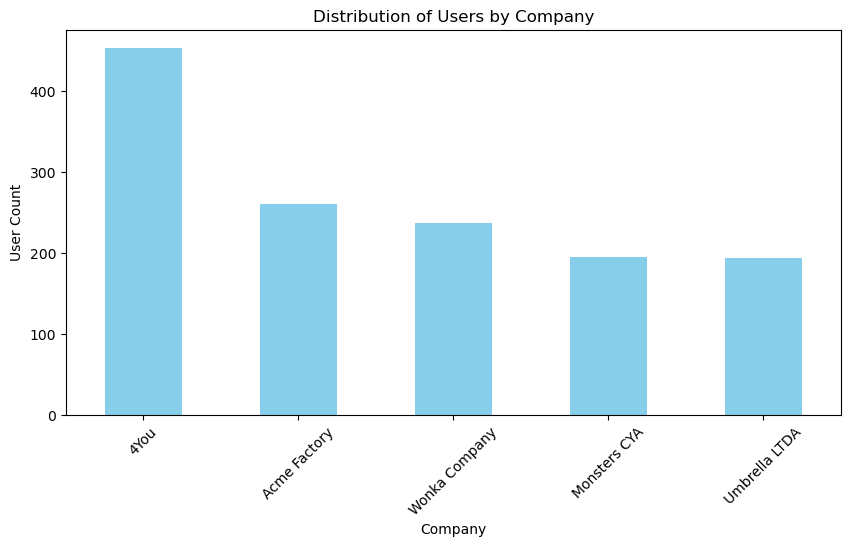

In [78]:
plt.figure(figsize=(10, 5))
users['company'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Users by Company")
plt.xlabel("Company")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 81, Finished, Available, Finished)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 82, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


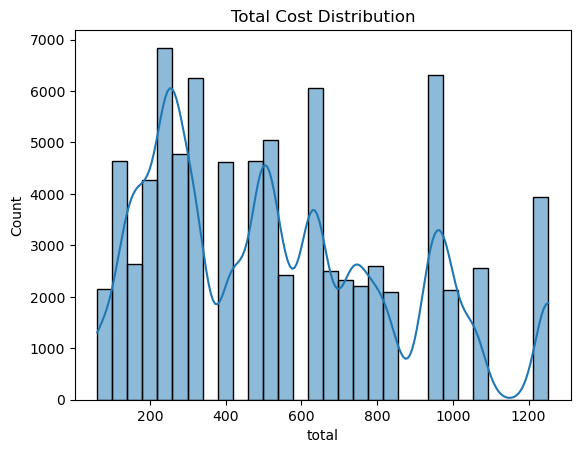

In [80]:
sns.histplot(merged_data["total"], bins=30, kde=True)
plt.title("Total Cost Distribution")
plt.show()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 83, Finished, Available, Finished)

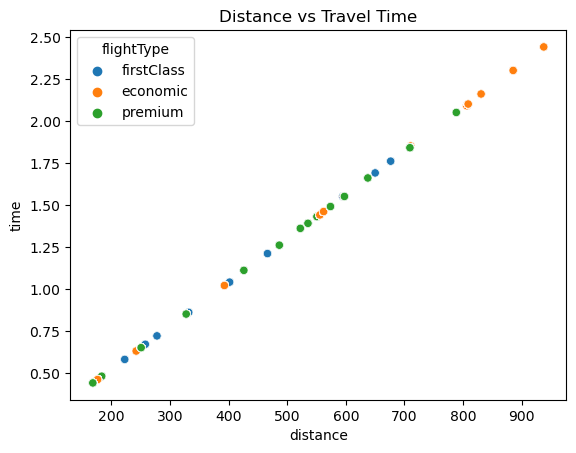

In [81]:
sns.scatterplot(data=merged_data, x="distance", y="time", hue="flightType")
plt.title("Distance vs Travel Time")
plt.show()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 84, Finished, Available, Finished)

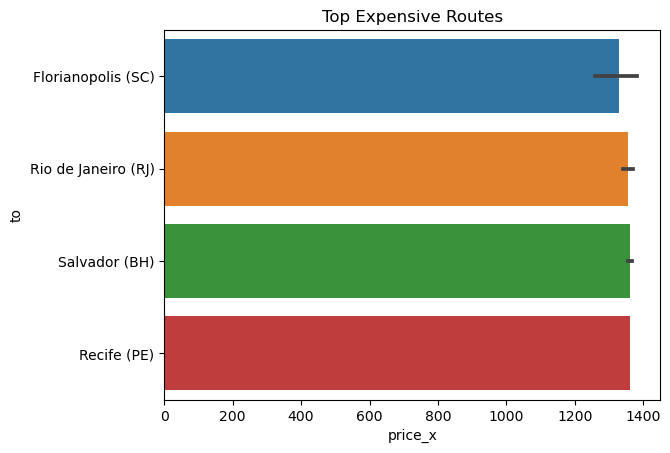

In [82]:
route_price = (
    merged_data.groupby(["from", "to"])["price_x"]
      .mean()
      .reset_index()
      .sort_values("price_x", ascending=False)
      .head(10)
)

sns.barplot(data=route_price, x="price_x", y="to")
plt.title("Top Expensive Routes")
plt.show()


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 85, Finished, Available, Finished)

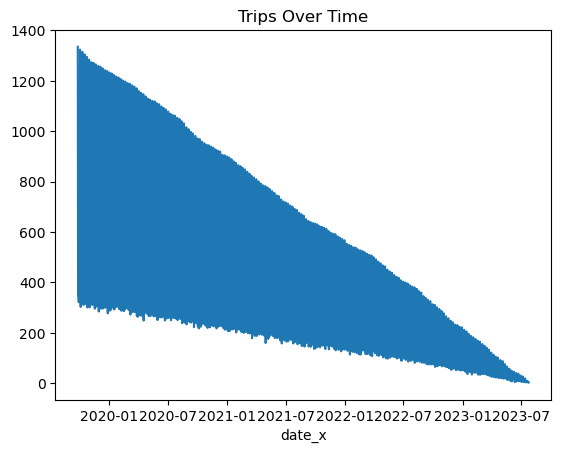

In [83]:
merged_data["date_x"] = pd.to_datetime(merged_data["date_x"])

daily = merged_data.groupby(merged_data["date_x"].dt.date).size()

daily.plot(kind="line")
plt.title("Trips Over Time")
plt.show()


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 86, Finished, Available, Finished)

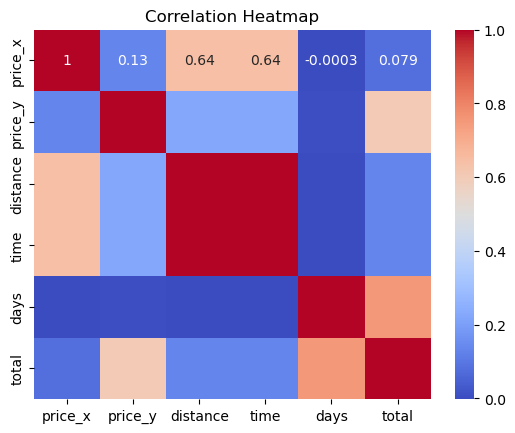

In [84]:
num_cols = ["price_x", "price_y", "distance", "time", "days", "total"]

sns.heatmap(merged_data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 87, Finished, Available, Finished)

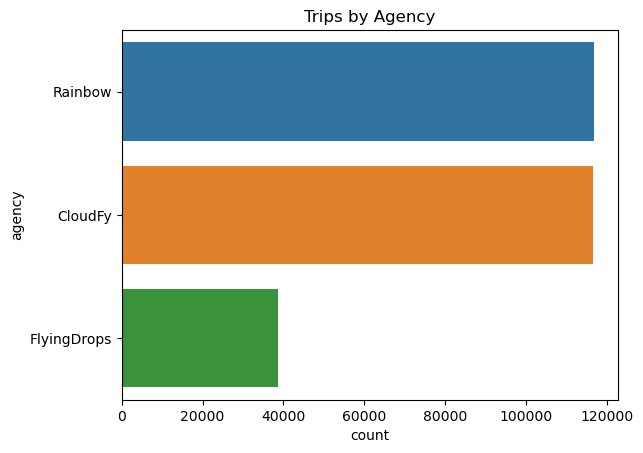

In [85]:
sns.countplot(data=merged_data, y="agency", order=merged_data["agency"].value_counts().index)
plt.title("Trips by Agency")
plt.show()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 88, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_ol

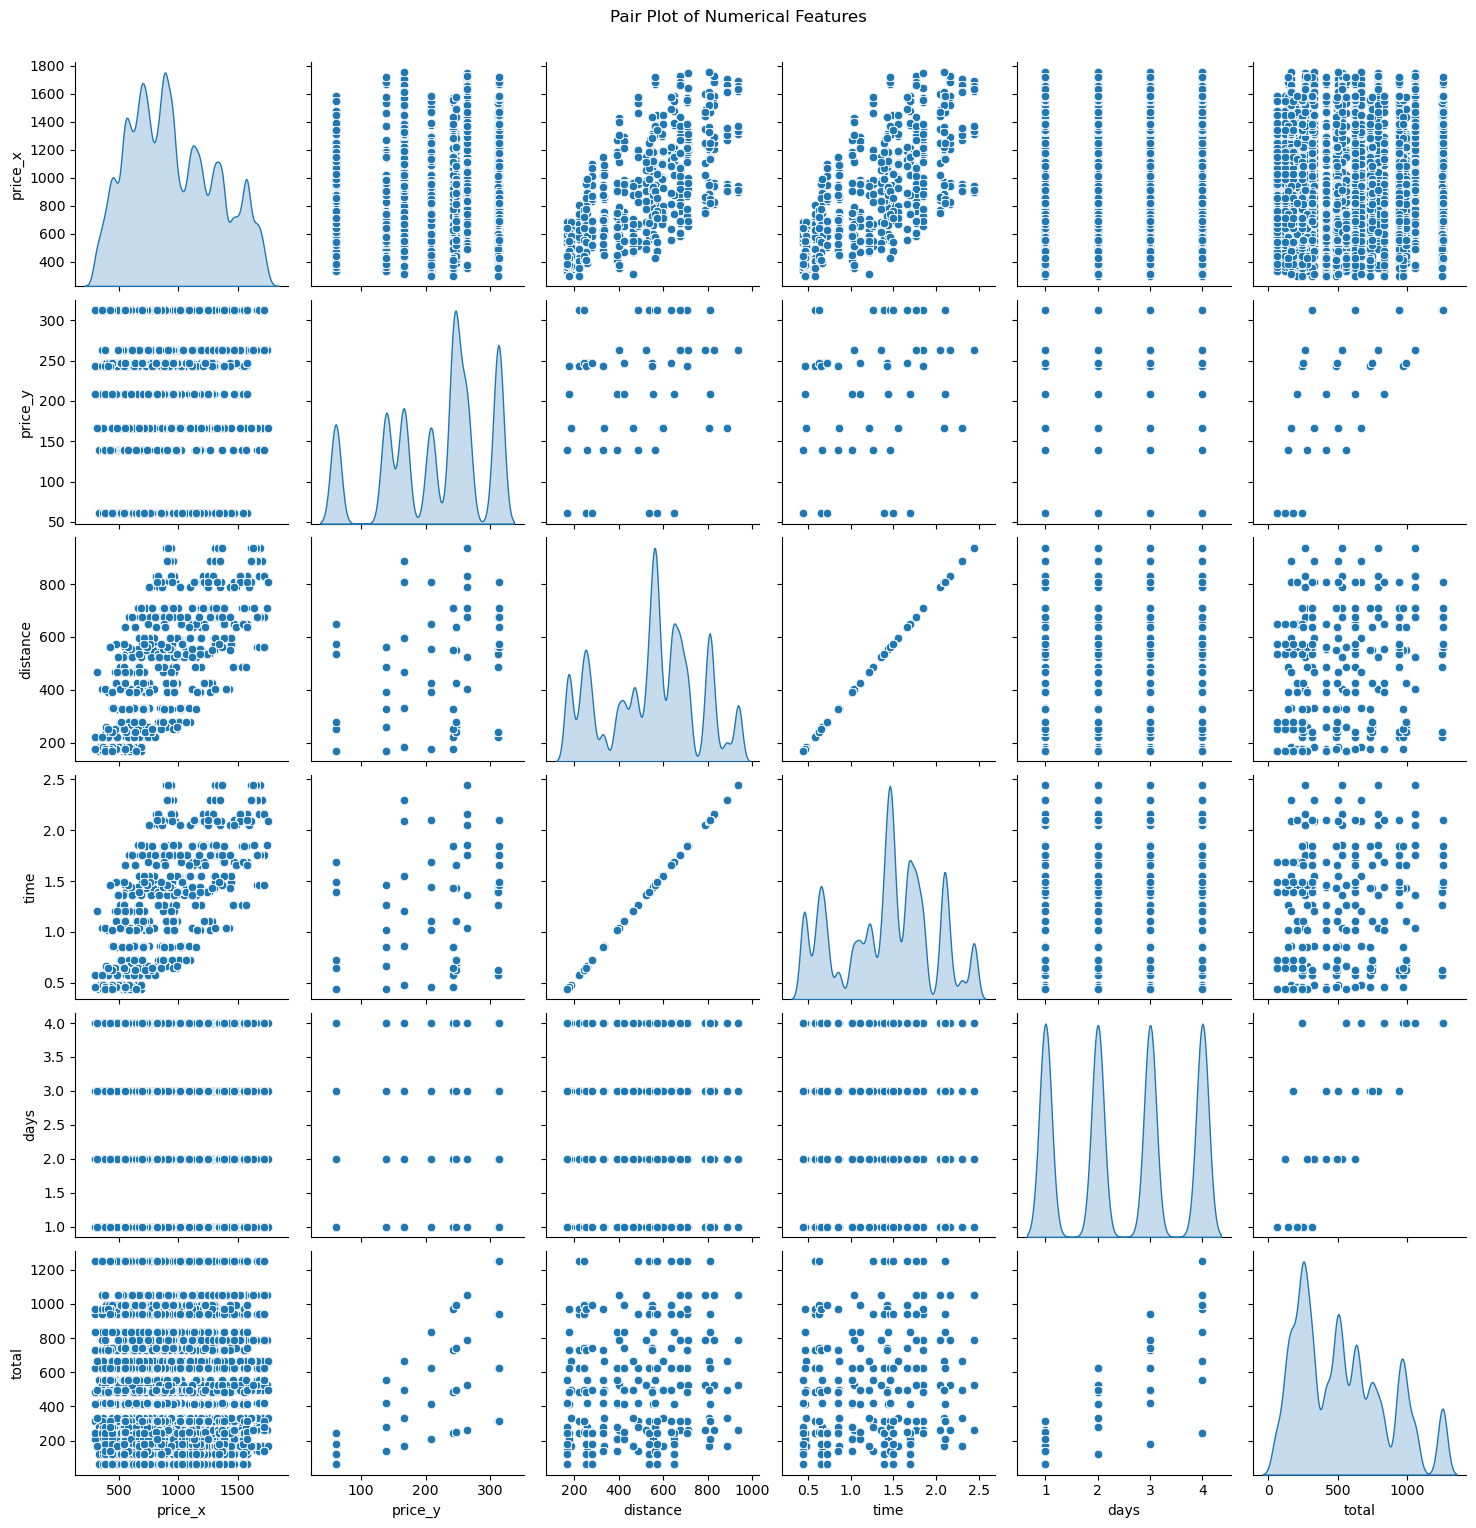

In [86]:
sns.pairplot(merged_data[num_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)  # Add a title
plt.show()

In [87]:
#Encoding flight type
flights['flightType'] = flights['flightType'].replace({'economic': 0, 'premium': 1, 'firstClass':3})

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 89, Finished, Available, Finished)

In [88]:
# Converting categorical variables to dummy/indicator variables
flights = pd.get_dummies(flights, columns=['from', 'to', 'flightType', 'agency'])

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 90, Finished, Available, Finished)

In [89]:
#Selecting features for the model 
X = flights.drop(columns=['travelCode', 'userCode', 'price', 'date'])
y = flights['price']

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 91, Finished, Available, Finished)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 92, Finished, Available, Finished)

In [91]:
#Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)   # fit on train
X_test  = scaler.transform(X_test)        # ONLY transform test


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 93, Finished, Available, Finished)

In [92]:
#Model Implementation Using ML Flow

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 94, Finished, Available, Finished)

In [96]:
X_train.shape, X_test.shape

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 98, Finished, Available, Finished)

((190321, 26), (81567, 26))

In [108]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

mlflow.set_experiment("flight-price-regression")

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=10,
    random_state=42
)


with mlflow.start_run():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mlflow.log_param("model", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 300)

    mlflow.log_metric("MAE", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("R2", r2_score(y_test, y_pred))

    mlflow.sklearn.log_model(model, "flight_price_model")



StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 110, Finished, Available, Finished)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 111, Finished, Available, Finished)

(0.9293795984089401, 4.783715485200496, 0.9998256580428805)

In [107]:
mlflow.end_run()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 109, Finished, Available, Finished)

In [115]:
mlflow.active_run()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 117, Finished, Available, Finished)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 112, Finished, Available, Finished)

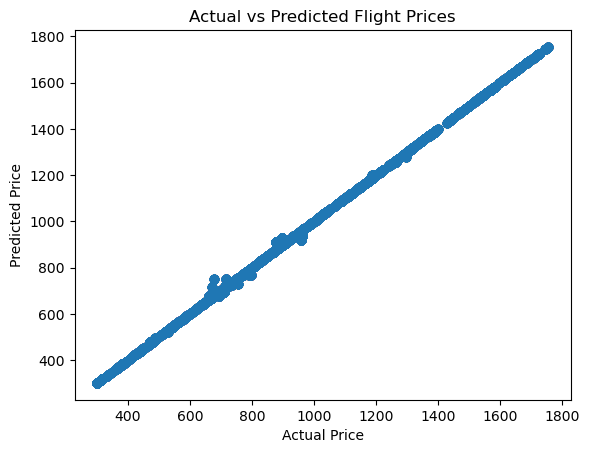

In [110]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.show()


In [111]:
# Nearly straight Graph means the Model is good.

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 113, Finished, Available, Finished)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 114, Finished, Available, Finished)

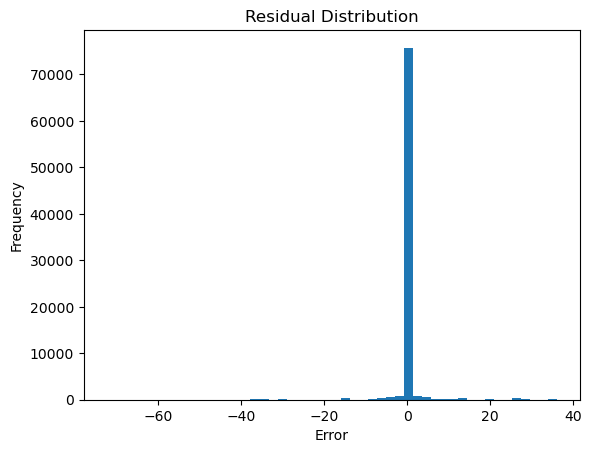

In [112]:
residuals = y_test - y_pred

plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [119]:
#Random Forest Regressor was selected as the final model based on its superior performance. 
#MLflow was used to track the experiment, log evaluation metrics, and store the trained model. 
#The experiment run was explicitly ended to ensure proper lifecycle management.

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 121, Finished, Available, Finished)

In [120]:
mlflow.search_runs()

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 122, Finished, Available, Finished)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.RMSE,metrics.MAE,metrics.R2,params.model,params.n_estimators,tags.synapseml.notebook.artifactId,tags.synapseml.run.artifactJobId,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.synapseml.livy.id,tags.synapseml.user.name,tags.mlflow.source.type,tags.synapseml.user.id
0,6378898b-0edc-4c2e-ad7c-9dc94e889d76,b617c2ec-fea2-4d56-9d67-a2080adf49d3,FINISHED,sds://onelakecentralindia.pbidedicated.windows...,2026-01-07 07:51:50.568000+00:00,2026-01-07 07:52:27.758000+00:00,4.783715e+00,9.293796e-01,0.999826,RandomForestRegressor,300,af0ca8eb-8e38-4c50-a425-8829cff612ed,a95fb0e6-762e-42a2-9a6d-a198ddff1cc3,trusted-service-user,/home/trusted-service-user/cluster-env/trident...,green_candle_cnkqrgvx,3fb6ca62-e987-4928-b75b-37309bb8428f,Ayush Singh Rana,LOCAL,c431da6a-0cfd-478e-bcaa-afc35f241220
1,21c91fe3-2192-4a7f-b44c-5a91291eca92,b617c2ec-fea2-4d56-9d67-a2080adf49d3,FINISHED,sds://onelakecentralindia.pbidedicated.windows...,2026-01-07 07:40:06.473000+00:00,2026-01-07 07:51:44.189000+00:00,NaN,NaN,NaN,None,None,af0ca8eb-8e38-4c50-a425-8829cff612ed,0b9e6fc1-696d-4d3e-a982-b24e2df4038d,trusted-service-user,/home/trusted-service-user/cluster-env/trident...,patient_longan_rk69gvxl,3fb6ca62-e987-4928-b75b-37309bb8428f,Ayush Singh Rana,LOCAL,c431da6a-0cfd-478e-bcaa-afc35f241220
2,5d3f3c0e-89fb-45ee-bde0-885622d98d7b,b617c2ec-fea2-4d56-9d67-a2080adf49d3,FINISHED,sds://onelakecentralindia.pbidedicated.windows...,2026-01-07 07:39:22.729000+00:00,2026-01-07 07:39:44.337000+00:00,6.256154e-12,4.700199e-12,1.000000,RandomForestRegressor,300,af0ca8eb-8e38-4c50-a425-8829cff612ed,eccd3253-09d1-4c29-abca-66305167ce9e,trusted-service-user,/home/trusted-service-user/cluster-env/trident...,tender_cloud_6sjkq1fz,3fb6ca62-e987-4928-b75b-37309bb8428f,Ayush Singh Rana,LOCAL,c431da6a-0cfd-478e-bcaa-afc35f241220


In [121]:
import mlflow.sklearn

run_id = "6378898b-0edc-4c2e-ad7c-9dc94e889d76"
model_uri = f"runs:/{run_id}/flight_price_model"

model = mlflow.sklearn.load_model(model_uri)


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 123, Finished, Available, Finished)

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 124, Finished, Available, Finished)

StatementMeta(, , -1, Finished, , Finished)

RejectSilentExecuteRequest: Livy session has failed. Error code: RejectSilentExecuteRequest. Rejected silent execute_request as there is no active session.

In [122]:
#sample prediction 
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)
prediction


StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 125, Finished, Available, Finished)

array([899.6])

In [124]:
#mlflow done saved the best model as flight_price_model in mlflow log with the above runid

StatementMeta(, 3fb6ca62-e987-4928-b75b-37309bb8428f, 128, Finished, Available, Finished)